# Statistical Distribtions

## You must master the definitions of the following terms
(We will review these cocnepts in class.  The following references go beyond what will be covered and include much useful inforamtion. )
1. [probability distribution functions (PDF)](https://en.wikipedia.org/wiki/Probability_distribution)
1. [cumulative distribtion functions (CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function) 
1. [the central limit theoriem](https://en.wikipedia.org/wiki/Central_limit_theorem)



## The Gaussian Distribtion (PDF)

The Gaussian (A.K.A. Normal) distribution is the most wellknown statistical distibtion.   It provides a good description of many experimental results.  It's PDF can be represnted as 
$$ \phi(x) =\frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2} \left(\frac{(x-\mu)}{\sigma}\right)^2 } $$ where $\mu$ is the mean, and $\sigma$ is the standard deviation.  We will define the mean and standard deviation below.


Python makes it easy to generate realizations of data from a wide variety of statical distribtions.  (see [Numpy](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html))

## A realization of a gaussian noise
Lets start by generating a ralization of gaussian noise comparing it to the analytic form above. 

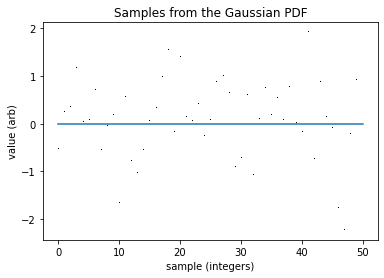

In [12]:
## import useful libraries
import numpy as np
import matplotlib.pyplot as plt

## generate a realization of N samples following a gaussian distribtion with zero mean and unit variance
N = 50
data = np.random.randn(N)

## plot this realization 
plt.plot(data,",k")
plt.title("Samples from the Gaussian PDF")
plt.xlabel("sample (integers)")
plt.ylabel("value (arb)")

## plot a line showing the mean
mean = 0
plt.plot(np.array([0,N]),np.array([1,1])* mean )

plt.show()

## Excercise
1. Overplot lines at +/- 1 sigma, and the +/- 2 sigma level
1. Increase the number of samples by a factor of 10, then 100, and then 1000 and see how this looks. 
1. If presented with guassian data, could you read the standard deviation off the plot?  Note: the variance and standard deviation of a gaussin are the same.

## Histograms and recovering distribtions from samples

If we have a realization of noise, we often want to determine its PDF.  We can do this by counting the number of samles in a given range and plotting the number as a fuciton of the central value for that range.  This is dedined as a histogram.  Python makes it easy to compute this.  We will now do this for our example above.

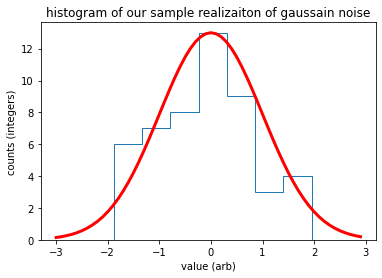

In [57]:
## regenerate a realizaiton of the random noise
N = 50
data = np.random.randn(N)

## make and plot a histrogam
counts, bins = np.histogram(data,bins="auto")
plt.stairs(counts, bins)


#plt.hist(, bins='auto')

## overplot the analytic form of a gaussin, guess the ampltude 
A = np.max(counts)
sigma = 1
x = np.arange(-3,3,0.1)
Gaussian = A *np.exp(-0.5*(x/sigma)**2)
plt.plot(x,Gaussian,"r-",linewidth=3)
plt.title("histogram of our sample realizaiton of gaussain noise")
plt.ylabel("counts (integers)")
plt.xlabel("value (arb)")
plt.show()

## excercises
1. re-run this code multiple times to generate new realizations of the gaussina noise.  Note how in the limit of a small sample size (N=5 was the default) the agreement between the PDF is hard to estimate
1. increase the sample size by factors of 10.  At what sample size does the distribtion become unambigous?  What sample size is required to know the distibution to 1%?

## confidence intervals

If we normalze the area under the probability distribtion to 1 (e.g., $\int P(x) dx = 1$) then we can compute intervals which contain a given fraction of the probability.  Below we compute the fraction of the probabilty contained within the +/- 1 $\sigma$ interval for a gaussain PDF.

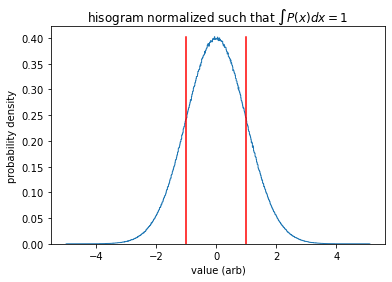

probability contained within +/-  1 of the mean is:  0.6831064
the probability outside the interval is:  0.3168936


In [86]:
## regenerate a realizaiton of the random noise
N = 10000000
data = np.random.randn(N)

## make and plot a histrogam
counts, bins = np.histogram(data,bins="auto")

## noramlize the hisogram
dx = bins[1] - bins[0] ## this is the width of the bins
counts = counts / np.sum(counts*dx)

## plot the normalized histogram
plt.stairs(counts, bins)
plt.title("hisogram normalized such that $\int P(x) dx = 1$")
plt.ylabel("probability density")
plt.xlabel("value (arb)")

## draw vertical linse at the +/- n_sigma, note this is normalized to have unit variance

n_sigma = 1  ## <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<. CHANGE THIS!!!
plt.plot(np.array([1,1])*n_sigma*-1,np.array([0,1])*np.max(counts),"r")
plt.plot(np.array([1,1])*n_sigma,np.array([0,1])*np.max(counts),"r")

## compute the area contained widhtin these limits

## this line figures out which data is in the interval
in_interval = np.where(np.logical_and(bins > -n_sigma,bins <n_sigma))
## this computes the integral over that range
integrated_probability = np.sum(counts[in_interval]*dx)

plt.show()

print("probability contained within +/- ",n_sigma,
      "of the mean is: ",integrated_probability)
print("the probability outside the interval is: ", 1-integrated_probability
     )


## Excercise

1. Fill out this table giving the probability contaned within 1,2,3,4, and 5 sigma interales as well as the probability outside these intervals
|$\pm sigma$  | P(inside) | P(outside)| 
| --- | --- | --- |
|$\pm 1 \sigma$| XX | XX |
|$\pm 2 \sigma$| XX | XX |
|$\pm 3 \sigma$| XX | XX |
|$\pm 4 \sigma$| XX | XX |
|$\pm 5 \sigma$| XX | XX | 
1. Are all of these estimtes believable?  Explain.

Note-- obviously you can do this analyticaly, but this is super easy and it tells you both what people mean when they talk about confidence intervals, and how to generalize this to other distribtions.  For gaussain distribtions the confidence intervals are related to the variance, for other distribtions the relatinship may be more complciated.   This shows how (for gaussian PDFs) the confidence intervals are realted to probability.  For refernce $5 \sigma$ should be about 1 in a million.

## Other probability distrition funcitons (PDFs)

A vast library of statistical distibtions with analytic descripions have been extensivly studdied and named.  These can be found in books on statistics and on [wikipedia](https://en.wikipedia.org/wiki/List_of_probability_distributions).  These distributions give the probaility density $P(x)$ which gives the relative probability that a random variable $x$ will occur.  A random variable is a potential outcome of an experiment or population, what we call a ‘data point’. 


### normalizaiton and cofidence intervals
These PDfs are typically normalized such that $\int P(x) dx = 1$.  With this normalizaiton we can interpret the proability of some range of events by integrating over that range.   For example the probability that $1<x<2$ is given by $\int_1^2 P(x) dx.




### Examples of distributions

Some imortant distibtions include:

1. The Gaussian (A.K.A. Normal) distribution which is the most well know statistical distibtion.   It provides a good description of some (or depending on your attitude many) experimental results.  In can be represnted as 
$$ \phi(x) =\frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2} \left(\frac{(x-\mu)}{\sigma}\right)^2 } $$ where $\mu$ is the mean, and $\sigma$ is the standard deviation.  

1. The Poisson distirbiton which describes the probability of some number of uncorrelated events happening in a given time interval.  $$ \phi(k,\lambda) =\frac{\lambda^k e^{-\lambda} }{k!}. $$  Here $\lambda$ is the probibility mass funciton, and $k$ is the number occurances.  Examples could include radioactive decay, or the arrival of photons in a astronomical destector.  For example if one 10 X-ray photons strike a detecor in 20 s, then the $\lambda = 0.5$ for a one second interval.  The poisson distribiton can then be evaluated to find the probaibility of detecting 1, 2, ...  photons in one second.

1. The Chi-squared distribiton gives the distribtion of the sum of the squares of $k$ indepndant gaussian distribtions.  $$\phi(x) = \frac{1}{2^{k/2} \Gamma(k/2) x^{k/2-1}e^{-x/2} .}$$ Here $k$ is the number of degrees of freedom, $x$ is the statistical quantity, and $\Gamma$ is a gamma function which like $\sin(x)$ can be evaluaed by computers.   This distribiton is very useful for goodnetss of fit tests.

1. The uniform distribtion which can be used to model where a point will fall in an interval with uniform probability.
 

In what follows we will generate realizations of these simulated data to illustrate some of the aspects of statistics that will be used in this course.


## Generating Realizations of Other PDFs

Python makes it easy to generate realizations of data from a wide variety of statical distribtions.  (see [this list of distribtions defined in Numpy](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html))




## Excercise

Modify the code below to generate a reaizaiton following the Poisson distribtion with $\lambda = 5$.  What do you notice that is different about this distribtion than the gaussain?

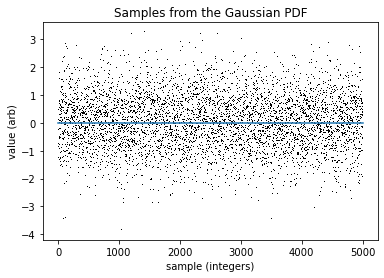

In [128]:
## import useful libraries
import numpy as np
import matplotlib.pyplot as plt

## generate a realization of N samples following a gaussian distribtion with zero mean and unit variance
N = 5000
data = np.random.randn(N)   ###<<<<<<<<<<<<<<<< modify this line

## plot this realization 
plt.plot(data,",k")
plt.title("Samples from the Gaussian PDF")
plt.xlabel("sample (integers)")
plt.ylabel("value (arb)")

## plot a line showing the mean
mean = 0
plt.plot(np.array([0,N]),np.array([1,1])* mean )

plt.show()


## Excercise 

The code below is already modifed to follow a chi-squared distirbtion with 50 degrees of freedom. 
1. Adust the paramters of the analytic gaussain to fit this by eye, if necessary.  Is the gaussain a good approxmiaiton to the shape?  
1. Approxmiatly what value of N samples is required make this comparison unambiguous.
1. What is or isn't different between the distribtion and a gaussain?  
1. Repeat the first three steps with 5 degrees of freedom.

add your answers to this excercise in this space

1.  anwere 
1.  anwere
1.  anwere
1.  anwere

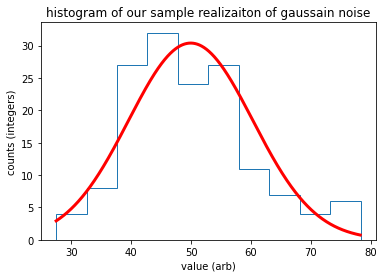

In [125]:
## regenerate a realizaiton of the random noise
N = 150
data = np.random.chisquare(50,N)

## make and plot a histrogam
counts, bins = np.histogram(data,bins="auto")
plt.stairs(counts, bins)


#plt.hist(, bins='auto')

## overplot the analytic form of a gaussin, guess the ampltude 
A = np.max(counts)*0.95
sigma = np.std(data)
x = np.arange(np.min(bins),np.max(bins),(np.max(bins) - np.min(bins))/1000.)
Gaussian = A *np.exp(-0.5*((x-np.mean(data))/sigma)**2)
plt.plot(x,Gaussian,"r-",linewidth=3)
plt.title("histogram of our sample realizaiton of gaussain noise")
plt.ylabel("counts (integers)")
plt.xlabel("value (arb)")
plt.show()

### Optional  Excercise: 
Choose one or more other distribitons and generate realziations and histograms.  Repeate the above excercises with these distribtions and build intuition.